In [11]:
# Step 0. Load libraries and custom modules
# Basic input/output
import pickle
import urllib
import tarfile
# Matrices and dataframes
import numpy as np
import pandas as pd
# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# Data pre-processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
# Clustering
from sklearn.cluster import KMeans

from pandas.core.internals.base import default_index

In [ ]:
# Step 1. Load data and prepare
# Information: These data contain gene expression values from a 
# manuscript authored by The Cancer Genome Atlas (TCGA) Pan-Cancer 
# analysis project investigators.
# There are 881 samples (rows) representing five distinct cancer 
# subtypes. Each sample has gene expression values for 
# 20,531 genes (columns). The dataset is available from the 
# UC Irvine Machine Learning Repository
# The labels are strings containing abbreviations of cancer types:
# BRCA: Breast invasive carcinoma
# COAD: Colon adenocarcinoma
# KIRC: Kidney renal clear cell carcinoma
# LUAD: Lung adenocarcinoma
# PRAD: Prostate adenocarcinoma

In [3]:
df_raw_data = pd.read_csv('../data.csv')
df_raw_labels = pd.read_csv('../labels.csv')

In [6]:
df_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20532 entries, Unnamed: 0 to gene_20530
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB


In [7]:
df_raw_data.sample(10)

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
60,sample_60,0.0,1.005687,2.075088,6.899985,9.789379,0.0,6.684356,0.000000,0.0,...,5.870853,8.683086,9.406360,7.247196,10.206367,11.904330,8.923128,10.023907,8.717858,0.0
490,sample_490,0.0,4.885818,4.505967,7.826765,9.496209,0.0,7.178993,0.494467,0.0,...,5.208560,8.253469,9.893488,1.397967,9.282699,11.908396,11.455764,9.409535,2.347184,0.0
20,sample_20,0.0,2.066916,2.619953,6.757997,11.123940,0.0,5.415674,0.000000,0.0,...,5.475669,9.852696,9.783769,5.846676,10.806791,11.009122,8.984886,10.356870,5.772084,0.0
309,sample_309,0.0,3.489029,3.511177,6.337722,10.198101,0.0,9.471700,0.000000,0.0,...,4.434948,7.963723,10.022493,6.094196,9.596326,11.963402,9.870138,9.515162,8.722060,0.0
245,sample_245,0.0,3.793126,4.246530,7.086890,9.699795,0.0,8.050224,0.000000,0.0,...,5.377971,8.206389,10.175974,4.891405,9.448139,11.684806,10.978939,9.561994,5.087832,0.0
288,sample_288,0.0,1.786638,1.768460,5.662160,10.360353,0.0,7.294281,1.056098,0.0,...,5.941165,7.907323,10.123358,1.389016,9.964891,11.407300,10.644857,9.912535,8.256968,0.0
607,sample_607,0.0,3.109528,2.768417,7.620484,10.082136,0.0,7.922073,1.257493,0.0,...,6.431351,9.356701,9.738937,0.000000,9.489172,12.067952,9.775265,9.385987,2.235390,0.0
729,sample_729,0.0,2.566645,4.023823,6.766304,9.516393,0.0,9.465797,1.085221,0.0,...,6.081966,8.475814,10.359080,5.447077,9.790290,12.240299,10.234997,9.079754,5.904231,0.0
562,sample_562,0.0,2.937947,1.878804,6.743838,10.169299,0.0,7.361654,1.027083,0.0,...,4.666206,7.682742,9.328525,5.995306,9.615823,11.534420,8.361821,9.378871,3.047050,0.0
590,sample_590,0.0,3.191168,2.927896,7.776644,10.637431,0.0,7.102007,1.156138,0.0,...,5.563106,8.655248,9.463998,0.495183,9.673131,12.597822,9.793197,9.748562,4.119497,0.0


In [10]:
df_raw_data.shape

(801, 20532)

In [8]:
df_raw_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  801 non-null    object
 1   Class       801 non-null    object
dtypes: object(2)
memory usage: 12.6+ KB


In [9]:
df_raw_labels.sample(10)

,Unnamed: 0,Class
58,sample_58,KIRC
6,sample_6,KIRC
164,sample_164,PRAD
384,sample_384,PRAD
274,sample_274,KIRC
244,sample_244,LUAD
7,sample_7,PRAD
156,sample_156,BRCA
775,sample_775,BRCA
268,sample_268,BRCA


In [ ]:
#Para proyecto

#df_raw
#df_processed - Data procesada
#df_final - Data Final

In [13]:
df_interim_data = df_raw_data.drop(df_raw_data.columns[0], axis=1).copy()
df_interim_labels = df_raw_labels.drop(df_raw_labels.columns[0], axis=1).copy()

df_interim = pd.concat([df_interim_data, df_interim_labels], axis=1)

In [14]:
df_interim.describe().T

,count,mean,std,min,25%,50%,75%,max
gene_0,801.0,0.026642,0.136850,0.000000,0.000000,0.000000,0.000000,1.482332
gene_1,801.0,3.010909,1.200828,0.000000,2.299039,3.143687,3.883484,6.237034
gene_2,801.0,3.095350,1.065601,0.000000,2.390365,3.127006,3.802534,6.063484
gene_3,801.0,6.722305,0.638819,5.009284,6.303346,6.655893,7.038447,10.129528
gene_4,801.0,9.813612,0.506537,8.435999,9.464466,9.791599,10.142324,11.355621
...,...,...,...,...,...,...,...,...
gene_20526,801.0,11.742228,0.670371,9.045255,11.315857,11.749802,12.177852,13.715361
gene_20527,801.0,10.155271,0.580569,7.530141,9.836525,10.191207,10.578561,11.675653
gene_20528,801.0,9.590726,0.563849,7.864533,9.244219,9.566511,9.917888,12.813320
gene_20529,801.0,5.528177,2.073859,0.593975,4.092385,5.218618,6.876382,11.205836


In [16]:
X = df_interim.drop(['Class'], axis=1).copy()
y = df_interim['Class'].copy()

In [17]:
#Reducimos la gran cantidad de columnas
pca = PCA(n_components=2, random_state=2145)
X_pcaed = pca.fit_transform(X)

In [18]:
pca_df = pd.DataFrame()

pca_df['x_0'] = X_pcaed[:,0]
pca_df['x_1'] = X_pcaed[:,1]
pca_df['labels'] = y.reset_index(drop=True)

/home/arnaldoch/Documents/Bootcamp_Data_Science/Clases/dim_reduction/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnaldoch/Documents/Bootcamp_Data_Science/Clases/dim_reduction/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnaldoch/Documents/Bootcamp_Data_Science/Clases/dim_reduction/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnaldoch/Documents/Bootcamp_Data_Science/C

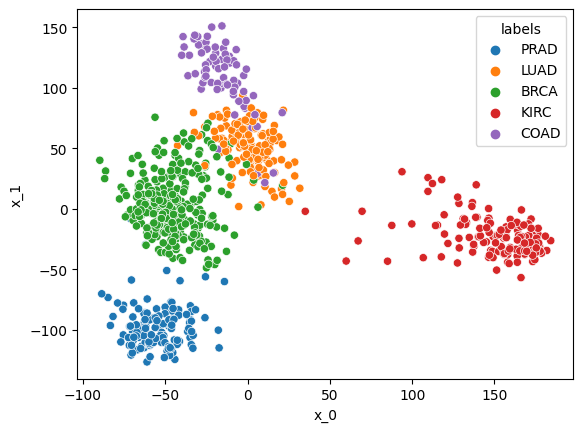

In [19]:
sns.scatterplot(data=pca_df, x='x_0', y='x_1', hue='labels')
plt.show()

In [22]:
#TSNE Trata de capturar las diferencias de forma espacial. No asume linealidad como PCA

tsne = TSNE(n_components=2, init='random', learning_rate=200)

X_tsneed = tsne.fit_transform(X)

In [23]:
tsne_df = pd.DataFrame()

tsne_df['x_0'] = X_tsneed[:,0]
tsne_df['x_1'] = X_tsneed[:,1]
tsne_df['labels'] = y.reset_index(drop=True)

/home/arnaldoch/Documents/Bootcamp_Data_Science/Clases/dim_reduction/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnaldoch/Documents/Bootcamp_Data_Science/Clases/dim_reduction/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnaldoch/Documents/Bootcamp_Data_Science/Clases/dim_reduction/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnaldoch/Documents/Bootcamp_Data_Science/C

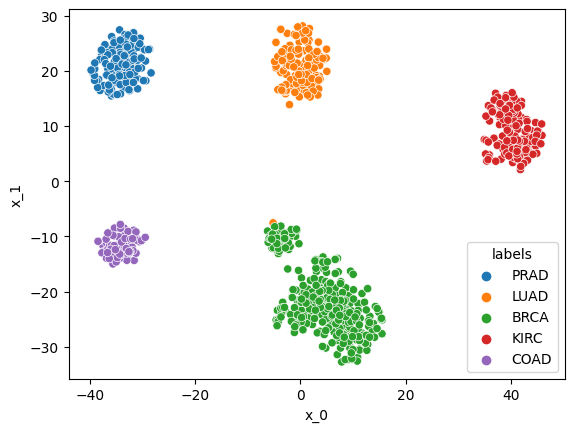

In [24]:
sns.scatterplot(data=tsne_df, x='x_0', y='x_1', hue='labels')
plt.show()

In [ ]:
#El PCA se puede regresar a sus valores originales, porque se aplicó una transformación lineal
#El problema del TSNE es que no se puede regresar a los valores, son valores originales.

In [25]:
#Si necesito usar mas de dos x_0 y x_1, debo hacer varios pairplot, todas las variables contra todas 